✅ Accuracy: 0.989237668161435

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.92      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



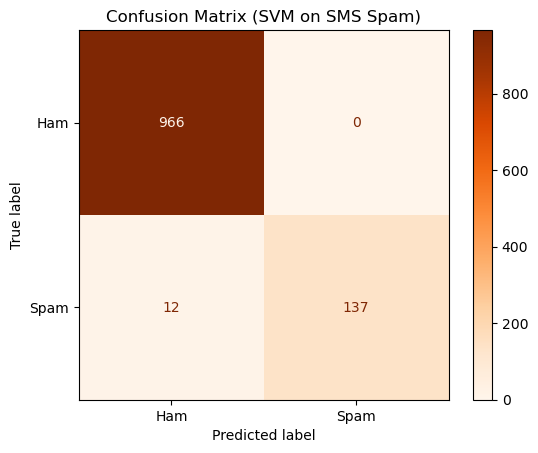

In [3]:
# 📦 Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 📄 Load dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/Practice/SMSSpamCollection.txt"
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

# ✅ Encode labels: spam = 1, ham = 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

# 📊 TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 🔮 Train SVM with RBF Kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_vec, y_train)

# 📈 Evaluate
y_pred = svm_model.predict(X_test_vec)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 📉 Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Ham", "Spam"], cmap="Oranges")
plt.title("Confusion Matrix (SVM on SMS Spam)")
plt.show()

Accuracy: 0.9937219730941704

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.95      0.98       149

    accuracy                           0.99      1115
   macro avg       1.00      0.98      0.99      1115
weighted avg       0.99      0.99      0.99      1115



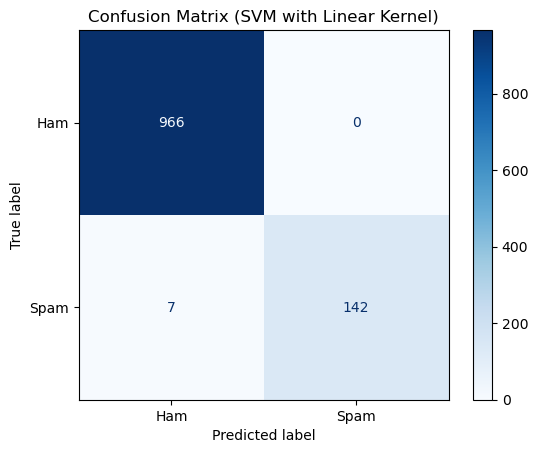

In [7]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_vec, y_train)

y_pred_linear = svm_linear.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\n Classification Report:\n", classification_report(y_test, y_pred_linear))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear, display_labels=["Ham", "Spam"], cmap="Blues")
plt.title("Confusion Matrix (SVM with Linear Kernel)")
plt.show()